In [2]:
$pip install graphviz

SyntaxError: invalid syntax (4275646343.py, line 1)

In [3]:
!pip install graphviz

You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install matplotlib

You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
!pip install pydotplus

Using legacy 'setup.py install' for pydotplus, since package 'wheel' is not installed.
    Running setup.py install for pydotplus: started
    Running setup.py install for pydotplus: finished with status 'done'


You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
!pip install io
!pip install random

ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io
You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
ERROR: Could not find a version that satisfies the requirement random (from versions: none)
ERROR: No matching distribution found for random
You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [7]:
!pip install io

ERROR: Could not find a version that satisfies the requirement io (from versions: none)
ERROR: No matching distribution found for io
You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
import pandas as pd
import numpy as np
import graphviz
import pydotplus
import matplotlib.image as mpimg
import io
import random

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing, tree, datasets
!pip install dtreeviz
#from dtreeviz.trees import dtreeviz

pd.set_option('display.max_rows', 10)
random.seed(24)

You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Using legacy 'setup.py install' for dtreeviz, since package 'wheel' is not installed.
    Running setup.py install for dtreeviz: started
    Running setup.py install for dtreeviz: finished with status 'done'


In [9]:
df_red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

df_red_wine['label'] = 1
df_white_wine['label'] = 0

df_merged_wine = pd.concat([df_red_wine, df_white_wine])
df_merged_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [10]:
df_white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [11]:
df_merged_wine['label'].value_counts(normalize=True)

# tidak seimbang label 0 dan 1 nya

0    0.753886
1    0.246114
Name: label, dtype: float64

In [12]:
# down-sampling commonly technique to balancing the dataset

red_wines = df_merged_wine[df_merged_wine['label'] == 1]
all_white_wines = df_merged_wine[df_merged_wine['label'] == 0]

white_wines = all_white_wines.sample(n=red_wines.shape[0], random_state=24)

df_wine_balanced = pd.concat([red_wines, white_wines])

df_wine_balanced

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,5.7,0.15,0.28,3.7,0.045,57.0,151.0,0.99130,3.22,0.27,11.2,6,0
632,6.9,0.24,0.33,4.8,0.040,16.0,131.0,0.99360,3.26,0.64,10.7,6,0
940,6.2,0.34,0.28,7.5,0.034,40.0,197.0,0.99485,3.14,0.60,9.7,5,0
2384,6.9,0.15,0.28,4.4,0.029,14.0,107.0,0.99347,3.24,0.46,10.4,8,0


In [13]:
df_wine_balanced['label'].value_counts(normalize=True)

# dataset sudah balance

1    0.5
0    0.5
Name: label, dtype: float64

In [14]:
# pembagian data train dan test

X = df_wine_balanced.drop('label', axis=1)
y = df_wine_balanced['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)

In [15]:
# Tuning the Model

def dtree_grid_search(X, y, nfolds):

    param_grid = {'criterion':['gini','entropy'], 
                  'class_weight':['balanced',None], 
                  'splitter':['best','random'], 
                  'max_features':['auto', 'sqrt', 'log2', None], 
                  'max_depth': np.arange(3, 15)}

    dtree_model=DecisionTreeClassifier(random_state=24)
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    dtree_gscv.fit(X, y)
    
    return pd.DataFrame(dtree_gscv.best_params_, index=['Value']).T

dtree_grid_search(X_train, y_train, 10)

,Value
class_weight,None
criterion,entropy
max_depth,9
max_features,auto
splitter,best


In [16]:
# Creating the Decision Tree Model

classifier = tree.DecisionTreeClassifier(class_weight=None, 
                                         criterion='entropy', 
                                         max_depth=3,
                                         max_features='auto', 
                                         splitter='best', 
                                         random_state=24)
model = classifier.fit(X_train, y_train)
model.score(X_test, y_test)

0.9275

In [17]:
# Feature Importance

features_dict = {'feature_importances': classifier.feature_importances_, 'feature_names': X_train.columns}

pd.DataFrame(features_dict).sort_values(by='feature_importances', ascending=False).head(10)

,feature_importances,feature_names
6,0.604498,total sulfur dioxide
1,0.188027,volatile acidity
4,0.170670,chlorides
9,0.027795,sulphates
2,0.005923,citric acid
8,0.003087,pH
0,0.000000,fixed acidity
3,0.000000,residual sugar
5,0.000000,free sulfur dioxide
7,0.000000,density


In [18]:
# Visualising the Decision Tree
!pip install dtreeviz 
from dtreeviz.trees import dtreeviz
viz = dtreeviz(classifier, 
               X_train, 
               y_train,
               target_name='label',
               feature_names=X.columns.to_list(), 
               class_names=["red", "white"],
               scale=1.4)

viz.save("dtreeviz.svg")

viz

You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [ ]:
dot_data = io.StringIO()
tree.export_graphviz(classifier, out_file=dot_data, 
                     feature_names=X.columns.to_list(),  
                     filled=True,
                     class_names=['red', 'white'],
                     rounded=True)

filename = "graphviz.png"
pydotplus.graph_from_dot_data(dot_data.getvalue()).write_png(filename)

plt.figure(figsize=(25,10))
plt.box(False)

img = mpimg.imread(filename)
fig = plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

plt.show()

In [19]:
# Using the Model to Make Predictions

def predict_single_label(fixed_acidity, 
                         volatile_acidity, 
                         citric_acid, 
                         residual_sugar, 
                         chlorides, 
                         free_sulfur_dioxide, 
                         total_sulfur_dioxide, 
                         density, 
                         pH, 
                         suplhates, 
                         alcohol, 
                         quality):
    y_predict = classifier.predict([[fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, suplhates, alcohol, quality]])[0]
    return "red" if y_predict == 1 else "white"

In [20]:
df_wine_balanced.head(1)
df_wine_balanced.tail(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
1150,6.9,0.32,0.17,7.6,0.042,69.0,219.0,0.9959,3.13,0.4,8.9,5,0


In [21]:
test1 = predict_single_label(7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4, 5)
test2 = predict_single_label(6.9, 0.32, 0.17, 7.6, 0.042, 69.0, 219.0, 0.9959, 3.13, 0.4, 8.9, 5)
test1, test2

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


('red', 'white')

In [22]:
# another prediction

df_predictions = X_test.copy()
df_predictions['label'] = y_test
df_predictions['predicted_label'] = classifier.predict(X_test)

df_predictions

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label,predicted_label
23,7.6,0.670,0.14,1.5,0.074,25.0,168.0,0.99370,3.05,0.51,9.3,5,0,1
1562,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5,1,1
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,1,1
1569,6.2,0.510,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5,6,1,1
2792,6.8,0.260,0.44,8.2,0.046,52.0,183.0,0.99584,3.20,0.51,9.4,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5,1,0
3676,5.3,0.300,0.30,1.2,0.029,25.0,93.0,0.98742,3.31,0.40,13.6,7,0,0
3764,5.4,0.460,0.15,2.1,0.026,29.0,130.0,0.98953,3.39,0.77,13.4,8,0,0
1303,8.0,0.280,0.44,1.8,0.081,28.0,68.0,0.99501,3.36,0.66,11.2,5,1,1


In [23]:
filter_correct = df_predictions['label'] == df_predictions['predicted_label']
df_predictions_correct = df_predictions.loc[filter_correct]

calc_score = len(df_predictions.loc[filter_correct]) / len(df_predictions)
model_score = model.score(X_test, y_test)

calc_score, model_score

(0.9275, 0.9275)

In [24]:
# deploy model to production

text_representation = tree.export_text(classifier, feature_names=X.columns.to_list())
print(text_representation)

|--- total sulfur dioxide <= 74.50
|   |--- chlorides <= 0.05
|   |   |--- citric acid <= 0.09
|   |   |   |--- class: 1
|   |   |--- citric acid >  0.09
|   |   |   |--- class: 0
|   |--- chlorides >  0.05
|   |   |--- pH <= 3.12
|   |   |   |--- class: 1
|   |   |--- pH >  3.12
|   |   |   |--- class: 1
|--- total sulfur dioxide >  74.50
|   |--- volatile acidity <= 0.47
|   |   |--- chlorides <= 0.07
|   |   |   |--- class: 0
|   |   |--- chlorides >  0.07
|   |   |   |--- class: 0
|   |--- volatile acidity >  0.47
|   |   |--- sulphates <= 0.47
|   |   |   |--- class: 0
|   |   |--- sulphates >  0.47
|   |   |   |--- class: 1



In [ ]:
Random Forest Classification

In [26]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [27]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [28]:
# Reading the csv file and putting it into 'df' object

url = "https://raw.githubusercontent.com/WildanBudiawanZ/pembelajaran-mesin/main/heart_v2.csv"
df = pd.read_csv(url)

df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [29]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)
# Putting response variable to y
y = df['heart disease']

In [30]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(
    random_state=42, 
    n_jobs=-1, 
    max_depth=5,
    n_estimators=100, 
    oob_score=True
    )

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [32]:
classifier_rf.oob_score_

0.656084656084656

In [33]:
# hyperparameter tuning for Random Forest using GridSearchCV and fit the data

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=params,
    cv = 4,
    n_jobs=-1,
    verbose=1, 
    scoring="accuracy"
    )

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [34]:
grid_search.best_score_

0.6985815602836879

In [35]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=10, n_estimators=10,
                       n_jobs=-1, random_state=42)

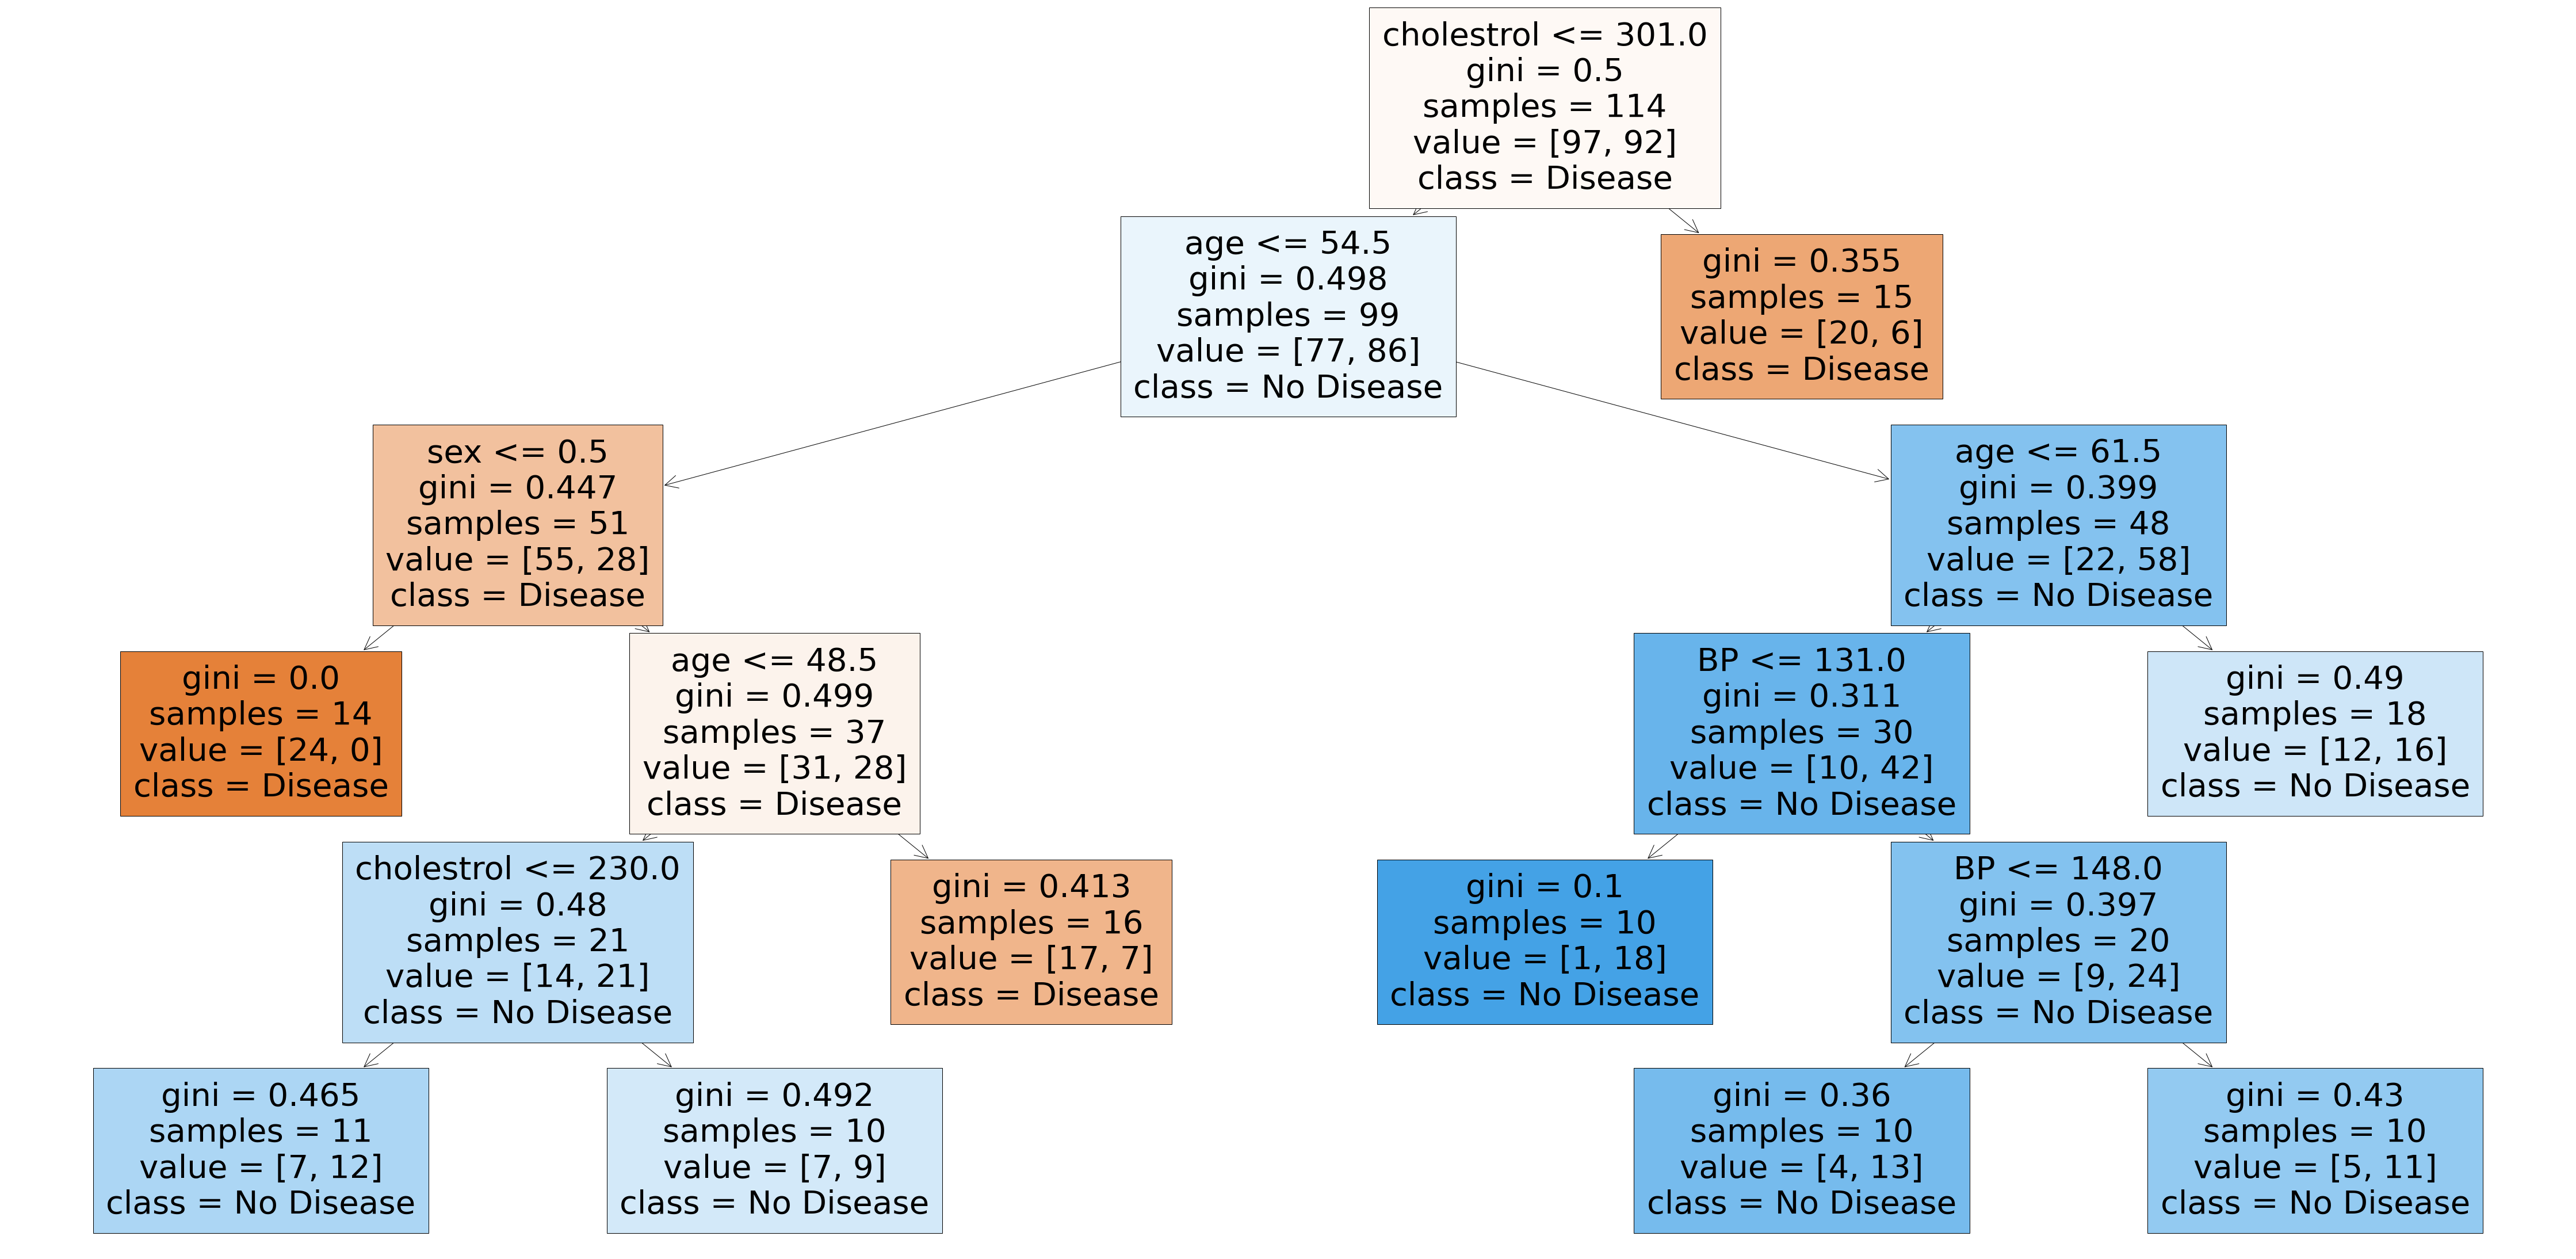

In [36]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Disease', "No Disease"],filled=True);

In [37]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,age,0.461285
1,sex,0.218085
3,cholestrol,0.188884
2,BP,0.131746


In [ ]:
K-Neirest Neightbor

In [38]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [39]:
# Reading the csv file and putting it into 'df' object

url = "https://github.com/WildanBudiawanZ/pembelajaran-mesin/raw/main/iris.csv"
df = pd.read_csv(url)

df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [40]:
df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [41]:
df.isnull().values.any()

False

In [42]:
df['variety'] = df['variety'].map({'Setosa' :0, 'Versicolor' :1, 'Virginica' :2}).astype(int) #mapping numbers
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


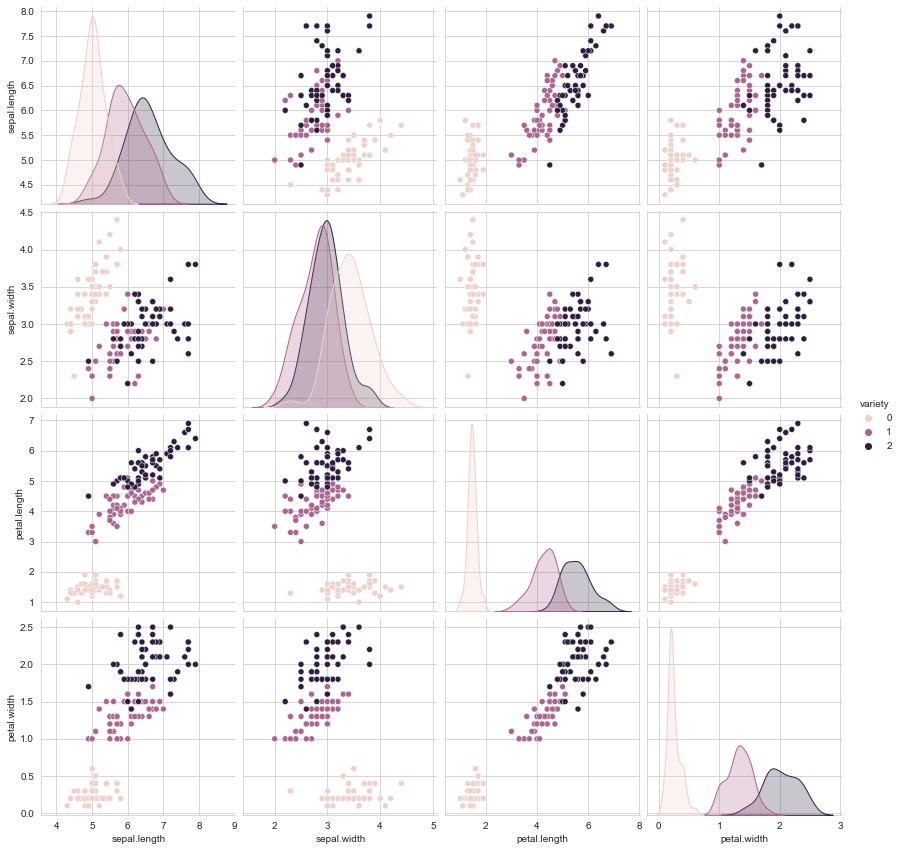

In [43]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df, hue='variety', height=3);
plt.show()

C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


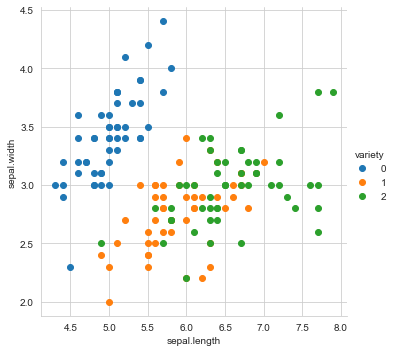

In [44]:
sns.set_style('whitegrid');
sns.FacetGrid(df, hue='variety', size=5) \
.map(plt.scatter, 'sepal.length', 'sepal.width') \
.add_legend();
plt.show()

In [45]:
x_data = df.drop(['variety'],axis=1)
y_data = df['variety']
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=['sepal.length', 'sepal.width', 'petal.length', 'petal.width'])
df.head(100)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 1)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test)
ypred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [47]:
print(knn_clf.predict([[0.416667, 0.833333, 0.033898, 0.041667]]))

[0]


C:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print('Confusion Matrix:')
print(result)
result1 = classification_report(y_test, ypred)
print('Classification Report:',)
print (result1)
result2 = accuracy_score(y_test,ypred)
print('Accuracy:',result2)

Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667


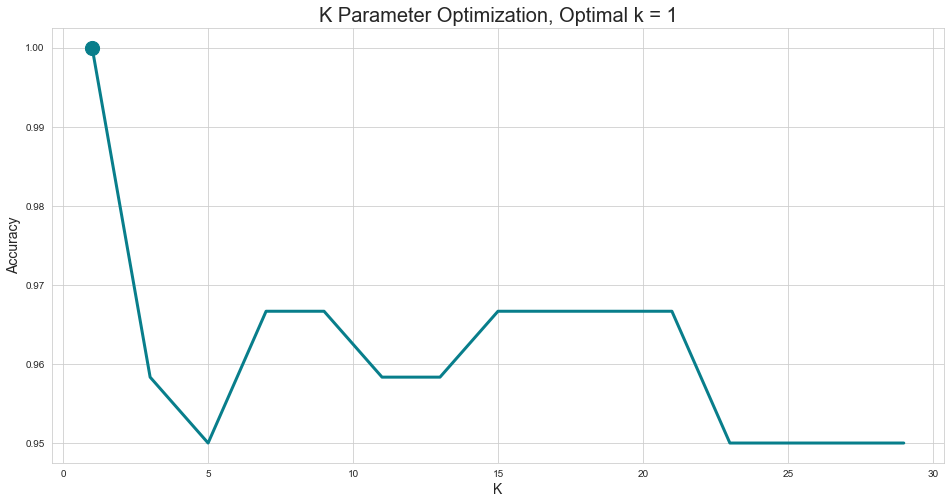

In [49]:
import pandas as pd

n_neighbors = 15

evals = []
for n_neighbors in range(1, 30, 2):
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_train, y_train) 
    score = accuracy_score(clf.predict(X_train), y_train)
    evals.append({'k': n_neighbors, 'accuracy': score})


evals = pd.DataFrame(evals)
best_k = evals.sort_values(by='accuracy', ascending=False).iloc[0]
plt.figure(figsize=(16, 8))
plt.plot(evals['k'], evals['accuracy'], lw=3, c='#087E8B')
plt.scatter(best_k['k'], best_k['accuracy'], s=200, c='#087E8B')
plt.title(f"K Parameter Optimization, Optimal k = {int(best_k['k'])}", size=20)
plt.xlabel('K', size=14)
plt.ylabel('Accuracy', size=14)
plt.show()

In [ ]:
Naives Bayes Classifier

In [50]:
df_wine_balanced

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,5.7,0.15,0.28,3.7,0.045,57.0,151.0,0.99130,3.22,0.27,11.2,6,0
632,6.9,0.24,0.33,4.8,0.040,16.0,131.0,0.99360,3.26,0.64,10.7,6,0
940,6.2,0.34,0.28,7.5,0.034,40.0,197.0,0.99485,3.14,0.60,9.7,5,0
2384,6.9,0.15,0.28,4.4,0.029,14.0,107.0,0.99347,3.24,0.46,10.4,8,0


In [51]:
# Variabel independen
x = df_wine_balanced.drop(["label"], axis = 1)
x.head()
# Variabel dependen
y = df_wine_balanced["label"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [53]:
from sklearn.naive_bayes import GaussianNB
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes Gaussian
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(x_train, y_train)

In [54]:
# Menentukan hasil prediksi dari x_test
y_pred = nbtrain.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,

In [55]:
np.array(y_test)

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,

In [56]:
# # Menentukan probabilitas hasil prediksi
nbtrain.predict_proba(x_test)

array([[1.70275487e-08, 9.99999983e-01],
       [9.99999821e-01, 1.79087420e-07],
       [9.70485941e-01, 2.95140586e-02],
       ...,
       [9.99999782e-01, 2.17987286e-07],
       [6.04826365e-02, 9.39517364e-01],
       [3.13014093e-22, 1.00000000e+00]])

In [57]:
# confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[311,  11],
       [  7, 311]], dtype=int64)

In [58]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       322
           1       0.97      0.98      0.97       318

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640

